<a href="https://colab.research.google.com/github/rajivmdd/Kaggle_Temperature/blob/main/McD_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**URL Link for dataset** : https://bit.ly/3SM0MQF


---

**Packages need to be installed**

pip numpy as np

pip pandas as pd

pip matplotlib.pyplot as plt

pip plotly.express as px

pip install pyspark

Importing essential library

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
!pip install pyspark
import pyspark
from pyspark.sql import SparkSession

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [124]:
spark = SparkSession.builder.appName('Test').getOrCreate()

In [125]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Files/McD_Data.csv')

In [126]:
df.head(10)

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24
5,Regular Menu,Veg Maharaja Mac,306 g,832.67,24.17,37.94,16.83,0.28,36.19,93.84,11.52,6.92,1529.22
6,Regular Menu,Green Chilli Aloo Naan,132 g,356.09,7.91,15.08,6.11,0.24,9.45,46.36,4.53,1.15,579.60
7,Regular Menu,Pizza Puff,87 g,228.21,5.45,11.44,5.72,0.09,5.17,24.79,2.73,0.35,390.74
8,Regular Menu,Mc chicken Burger,173 g,400.80,15.66,15.70,5.47,0.16,31.17,47.98,5.53,4.49,766.33
9,Regular Menu,FILLET-O-FISH Burger,136 g,348.11,15.44,14.16,5.79,0.21,32.83,38.85,5.58,3.54,530.54


In [127]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Energy (kCal),141.0,244.635461,185.554837,0.0,116.360,219.360,339.52,834.36
Protein (g),141.0,7.493546,8.336863,0.0,0.650,4.790,10.88,39.47
Total fat (g),141.0,9.991702,10.339511,0.0,0.460,7.770,14.16,45.18
Sat Fat (g),141.0,4.997589,4.900451,0.0,0.280,4.270,7.28,20.46
Trans fat (g),141.0,0.687163,6.326136,0.0,0.060,0.150,0.22,75.26
Cholesterols (mg),141.0,26.350071,50.334200,0.0,1.510,8.390,31.11,302.61
Total carbohydrate (g),141.0,31.190284,20.602044,0.0,15.740,30.820,46.00,93.84
Total Sugars (g),141.0,15.464894,15.690202,0.0,2.330,9.160,26.95,64.22
Added Sugars (g),141.0,10.336950,14.283388,0.0,0.000,3.640,19.23,64.22
Sodium (mg),140.0,362.064143,473.160490,0.0,43.895,152.025,534.24,2399.49


Type of data

In [128]:
df.dtypes

Menu Category              object
Menu Items                 object
Per Serve Size             object
Energy (kCal)             float64
Protein (g)               float64
Total fat (g)             float64
Sat Fat (g)               float64
Trans fat (g)             float64
Cholesterols (mg)         float64
Total carbohydrate (g)    float64
Total Sugars (g)          float64
Added Sugars (g)          float64
Sodium (mg)               float64
dtype: object

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Menu Category           141 non-null    object 
 1   Menu Items              141 non-null    object 
 2   Per Serve Size          141 non-null    object 
 3   Energy (kCal)           141 non-null    float64
 4   Protein (g)             141 non-null    float64
 5   Total fat (g)           141 non-null    float64
 6   Sat Fat (g)             141 non-null    float64
 7   Trans fat (g)           141 non-null    float64
 8   Cholesterols (mg)       141 non-null    float64
 9   Total carbohydrate (g)  141 non-null    float64
 10  Total Sugars (g)        141 non-null    float64
 11  Added Sugars (g)        141 non-null    float64
 12  Sodium (mg)             140 non-null    float64
dtypes: float64(10), object(3)
memory usage: 14.4+ KB


List of Columns for future use

In [130]:
list_columns = df.columns.values.tolist()
list_columns

['Menu Category',
 'Menu Items',
 'Per Serve Size',
 'Energy (kCal)',
 'Protein (g)',
 'Total fat (g)',
 'Sat Fat (g)',
 'Trans fat (g)',
 'Cholesterols (mg)',
 'Total carbohydrate (g)',
 'Total Sugars (g)',
 'Added Sugars (g)',
 'Sodium (mg)']

In [131]:
df.shape

(141, 13)

In [132]:
df['Sodium (mg)'].fillna(0, inplace = True)

In [133]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Menu Category           141 non-null    object 
 1   Menu Items              141 non-null    object 
 2   Per Serve Size          141 non-null    object 
 3   Energy (kCal)           141 non-null    float64
 4   Protein (g)             141 non-null    float64
 5   Total fat (g)           141 non-null    float64
 6   Sat Fat (g)             141 non-null    float64
 7   Trans fat (g)           141 non-null    float64
 8   Cholesterols (mg)       141 non-null    float64
 9   Total carbohydrate (g)  141 non-null    float64
 10  Total Sugars (g)        141 non-null    float64
 11  Added Sugars (g)        141 non-null    float64
 12  Sodium (mg)             141 non-null    float64
dtypes: float64(10), object(3)
memory usage: 14.4+ KB


In [134]:
df.head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24


Menu having Maximum Kcal and minimum Kcal

In [135]:
min_kcal = df['Energy (kCal)'].min()
Menu_Item_min = df.loc[df['Energy (kCal)'] == df['Energy (kCal)'].min() , 'Menu Items'].iloc[0]
print('The Item', Menu_Item_min , 'is having the Lowest Kcal of' , min_kcal)

The Item Vedica Natural Mineral Water is having the Lowest Kcal of 0.0


In [136]:
max_kcal = df['Energy (kCal)'].max()
Menu_Item_max = df.loc[df['Energy (kCal)'] == df['Energy (kCal)'].max() , 'Menu Items'].iloc[0]
print('The Item', Menu_Item_max , 'is having the Lhighest Kcal of' , max_kcal)

The Item Chicken Cheese Lava Burger is having the Lhighest Kcal of 834.36


Adding a New column with Menu category  on basis on Energy per gram of serve size

In [137]:
df.rename(columns= {'Per Serve Size': 'Per Serve Size (g)'}, inplace =True)

In [138]:
df.head()

,Menu Category,Menu Items,Per Serve Size (g),Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24


In [139]:
df['Per Serve Size (g)'] = df['Per Serve Size (g)'].str.replace(' g', '')

In [140]:
df['Per Serve Size (g)'] = df['Per Serve Size (g)'].str.replace(' ml', '')

In [141]:
df.head()

,Menu Category,Menu Items,Per Serve Size (g),Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24


In [142]:
df['Per Serve Size (g)']= df['Per Serve Size (g)'].apply(pd.to_numeric)

In [143]:
df.dtypes

Menu Category              object
Menu Items                 object
Per Serve Size (g)        float64
Energy (kCal)             float64
Protein (g)               float64
Total fat (g)             float64
Sat Fat (g)               float64
Trans fat (g)             float64
Cholesterols (mg)         float64
Total carbohydrate (g)    float64
Total Sugars (g)          float64
Added Sugars (g)          float64
Sodium (mg)               float64
dtype: object

In [144]:
df['Energy per gram of serve'] =  df['Energy (kCal)'] / df['Per Serve Size (g)']

In [145]:
df.dtypes

Menu Category                object
Menu Items                   object
Per Serve Size (g)          float64
Energy (kCal)               float64
Protein (g)                 float64
Total fat (g)               float64
Sat Fat (g)                 float64
Trans fat (g)               float64
Cholesterols (mg)           float64
Total carbohydrate (g)      float64
Total Sugars (g)            float64
Added Sugars (g)            float64
Sodium (mg)                 float64
Energy per gram of serve    float64
dtype: object

In [146]:
df.head(110)

,Menu Category,Menu Items,Per Serve Size (g),Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg),Energy per gram of serve
0,Regular Menu,McVeggie™ Burger,168.0,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,2.393155
1,Regular Menu,McAloo Tikki Burger®,146.0,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34,2.325479
2,Regular Menu,McSpicy™ Paneer Burger,199.0,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,3.280201
3,Regular Menu,Spicy Paneer Wrap,250.0,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,2.698720
4,Regular Menu,American Veg Burger,177.0,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,2.893616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Gourmet Menu,American Triple Cheese Veg,207.0,524.69,19.54,23.16,14.78,0.19,48.74,56.24,7.90,3.84,1174.27,2.534734
106,Gourmet Menu,Cheese Lava Burger,240.0,671.06,14.99,33.48,14.12,0.21,33.21,74.25,16.27,10.01,1153.99,2.796083
107,Gourmet Menu,Chicken Cheese Lava Burger,307.0,834.36,27.37,45.18,17.00,0.27,73.11,76.03,16.75,10.01,1745.04,2.717785
108,Gourmet Menu,Chunky Chipotle American Burger Chicken,301.0,641.36,39.47,31.51,9.54,0.26,110.37,46.24,9.16,6.32,1906.27,2.130764


In [147]:
df_E_vs_Menu = df.groupby('Menu Category')['Energy per gram of serve'].mean()


#Problem with Pandas group by is that in the header is not there in the dataframe. So going through second route that is PYSPARK. Sometime i feel PySpark is really a life saviour

In [148]:
df_E_vs_Menu.head().T

Menu Category
Beverages Menu     0.372421
Breakfast Menu     1.480990
Condiments Menu    2.125882
Desserts Menu      1.380728
Gourmet Menu       2.533930
Name: Energy per gram of serve, dtype: float64

In [149]:
df_py = spark.createDataFrame(df)

In [150]:
df_py.show()

+-------------+--------------------+------------------+-------------+-----------+-------------+-----------+-------------+-----------------+----------------------+----------------+----------------+-----------+------------------------+
|Menu Category|          Menu Items|Per Serve Size (g)|Energy (kCal)|Protein (g)|Total fat (g)|Sat Fat (g)|Trans fat (g)|Cholesterols (mg)|Total carbohydrate (g)|Total Sugars (g)|Added Sugars (g)|Sodium (mg)|Energy per gram of serve|
+-------------+--------------------+------------------+-------------+-----------+-------------+-----------+-------------+-----------------+----------------------+----------------+----------------+-----------+------------------------+
| Regular Menu|    McVeggie™ Burger|             168.0|       402.05|      10.24|        13.83|       5.34|         0.16|             2.49|                 56.54|             7.9|            4.49|     706.13|       2.393154761904762|
| Regular Menu|McAloo Tikki Burger®|             146.0|       33

In [151]:
df_E_vs_Menu = df_py.groupBy('Menu Category').mean('Energy per gram of serve')

In [152]:
df_E_vs_Menu.show()

+---------------+-----------------------------+
|  Menu Category|avg(Energy per gram of serve)|
+---------------+-----------------------------+
| Breakfast Menu|           1.4809897790104212|
|    McCafe Menu|           0.8312374567155142|
|   Regular Menu|            2.461547062180418|
|   Gourmet Menu|           2.5339295785782947|
|Condiments Menu|            2.125882098765432|
|  Desserts Menu|           1.3807282693882192|
| Beverages Menu|           0.3724206172960174|
+---------------+-----------------------------+



In [153]:
df_E_vs_Menu_pd = df_E_vs_Menu.toPandas()

In [154]:
df_E_vs_Menu_pd.head()

,Menu Category,avg(Energy per gram of serve)
0,Breakfast Menu,1.480990
1,McCafe Menu,0.831237
2,Regular Menu,2.461547
3,Gourmet Menu,2.533930
4,Condiments Menu,2.125882


<BarContainer object of 7 artists>

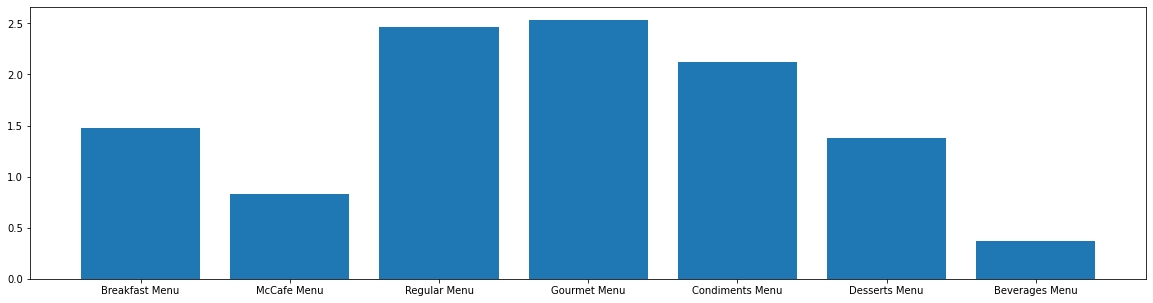

In [155]:
plt.figure(figsize=(20, 5))

plt.bar(df_E_vs_Menu_pd['Menu Category'], df_E_vs_Menu_pd['avg(Energy per gram of serve)'])

**Finding**
Dessert, McCafe and Beverage menu have low calories per gram. Healthy to eat

In [156]:
min_fat = df['Total fat (g)'].min()
min_fat_item = df.loc[df['Total fat (g)'] == min_fat, 'Menu Items'].iloc[0]
print("Menu item ", min_fat_item, " has least fat i.e: ", min_fat, "g")

max_fat = df['Total fat (g)'].max()
max_fat_item = df.loc[df['Total fat (g)'] == max_fat, 'Menu Items'].iloc[0]
print("Menu item: ", max_fat_item, " has max fat i.e:",max_fat, "g")

Menu item  L1 Coffee  has least fat i.e:  0.0 g
Menu item:  Chicken Cheese Lava Burger  has max fat i.e: 45.18 g


### **Donot eat choco lava cake instead have a sip of cofee**

In [157]:
Categories = df['Menu Category'].value_counts()

In [159]:
Categories

McCafe Menu        51
Regular Menu       36
Beverages Menu     17
Breakfast Menu     15
Gourmet Menu       11
Condiments Menu     9
Desserts Menu       2
Name: Menu Category, dtype: int64